In [1]:
#数据预处理
%matplotlib inline
import numpy as np
#import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import missingno as msno

#不加下面这一步进程很容易中断
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ["OMP_NUM_THREADS"] = '9'  

In [35]:
#用于在独立测试集上检验
fpath="./lasso__/8_train_score_med_xb.xlsx"
df1=pd.read_excel(fpath)

fpath="./lasso__/9_test_score_med_xb.xlsx"
df2=pd.read_excel(fpath)
    
#df1.drop('随访>3', axis=1, inplace=True)
#df2.drop('随访>3', axis=1, inplace=True)


df = pd.concat([df1, df2], axis=0)
df = df.head(160)

In [37]:
test_name = df.columns.tolist()
test_name.remove("随访>3")
test_name.remove("随访>=3")

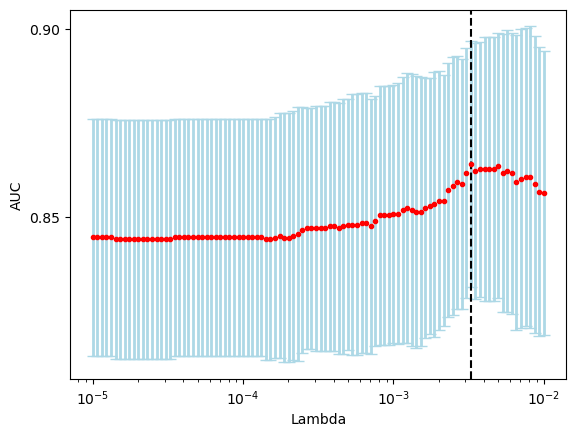

best lambda: 0.0032745491628777285


In [38]:
import sklearn
from sklearn.linear_model import LassoCV

y=df[["随访>=3"]]
X=df[test_name]
fold = 3

#根据AUC指标获得最佳lambda，并绘图--------------------------------------

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import matplotlib.ticker as ticker
# 创建 Lasso 模型
lasso = Lasso(max_iter=100000)

# 创建交叉验证分割器
cv = StratifiedKFold(n_splits=fold)

# 指定参数范围
alphas = np.logspace(-5, -2, 100)

# 使用 GridSearchCV 搜索最佳 alpha 值
grid_search = GridSearchCV(lasso, {'alpha': alphas}, cv=cv, scoring='roc_auc')
grid_search.fit(X, y)

# 获取交叉验证结果
results = grid_search.cv_results_

# 提取相关信息
AUCs_mean = results['mean_test_score']
AUCs_std = results['std_test_score']
alphas = results['param_alpha'].data.astype(float)

# 绘制 Lambda 选择图
plt.figure()
plt.errorbar(alphas, AUCs_mean, yerr=AUCs_std,
             fmt='o', ms=3, mfc='r', mec='r', ecolor='lightblue', elinewidth=2, capsize=4, capthick=1)
plt.semilogx()
plt.axvline(grid_search.best_params_['alpha'], color='black', ls='--')
plt.xlabel('Lambda')
plt.ylabel('AUC')
ax = plt.gca()
y_major_locator = ticker.MultipleLocator(0.05)
ax.yaxis.set_major_locator(y_major_locator)
plt.show()

best_lam = grid_search.best_params_['alpha']
print("best lambda:",best_lam)

In [ ]:
#根据最佳lambda，第二次筛选特征，并绘制权重图--------------------------------------

#model_lassoCV = LassoCV(alphas = alphas, cv = fold, max_iter = 100000).fit(X,y)
model_lassoCV = LassoCV(alphas = [best_lam], cv = fold, max_iter = 100000).fit(X,y)


name = X.columns.tolist()
coef = model_lassoCV.coef_.tolist()
print("最优lamda：",best_lam)
print("保留特征数：",len(coef)-coef.count(0))
print("淘汰特征数：",coef.count(0))
print("------------------------------")
indices = [i for i, value in enumerate(coef) if value != 0]
feature = [name[i] for i in indices]
feature_coef = [coef[i] for i in indices]
for i in range(len(feature)):
    print(feature[i],"---",feature_coef[i])
    
# 示例数据
data = {'Features': feature,
        'Value': feature_coef}

# 转换为 DataFrame
temp = pd.DataFrame(data)

# 绘制带有正负值的条形图
plt.figure(figsize=(6, 4))
color = sns.color_palette('Blues')[3]
ax = sns.barplot(y='Features', x='Value', data=temp, color = color, dodge=True)#通过调换xy旋转整个图
#ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=8)
plt.title('Bar Plot with Features Values')
plt.show()

In [ ]:
#neg_log_loss

import sklearn
from sklearn.linear_model import LassoCV

y=df[["随访>=3"]]
X=df[test_name]
fold = 3

#根据AUC指标获得最佳lambda，并绘图--------------------------------------

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import matplotlib.ticker as ticker
# 创建 Lasso 模型
lasso = Lasso(max_iter=100000)

# 创建交叉验证分割器
cv = StratifiedKFold(n_splits=fold)

# 指定参数范围
alphas = np.logspace(-5, -2, 50)

# 使用 GridSearchCV 搜索最佳 alpha 值
grid_search = GridSearchCV(lasso, {'alpha': alphas}, cv=cv, scoring='neg_log_loss')
grid_search.fit(X, y)

# 获取交叉验证结果
results = grid_search.cv_results_

# 提取相关信息
AUCs_mean = results['mean_test_score']
AUCs_std = results['std_test_score']
alphas = results['param_alpha'].data.astype(float)

# 绘制 Lambda 选择图
plt.figure()
plt.errorbar(alphas, AUCs_mean, yerr=AUCs_std,
             fmt='o', ms=3, mfc='r', mec='r', ecolor='lightblue', elinewidth=2, capsize=4, capthick=1)
plt.semilogx()
plt.axvline(grid_search.best_params_['alpha'], color='black', ls='--')
plt.xlabel('Lambda')
plt.ylabel('binomial deviance')
ax = plt.gca()
y_major_locator = ticker.MultipleLocator(0.05)
ax.yaxis.set_major_locator(y_major_locator)
plt.show()

best_lam = grid_search.best_params_['alpha']
print("best lambda:",best_lam)

In [ ]:
import sklearn
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Assuming df is your DataFrame
y = df["随访>=3"].values  # Extracting the NumPy array
X = df[test_name]
fold = 3

# Create Lasso model
lasso = Lasso(max_iter=100000)

# Create StratifiedKFold cross-validation splitter
cv = StratifiedKFold(n_splits=fold)

# Specify alpha parameter values
alphas = np.logspace(-5, -2, 50)

# Use GridSearchCV to search for the best alpha value
grid_search = GridSearchCV(lasso, {'alpha': alphas}, cv=cv, scoring='neg_log_loss')
grid_search.fit(X, y)

# Extract relevant information
results = grid_search.cv_results_
AUCs_mean = results['mean_test_score']
AUCs_std = results['std_test_score']
alphas = results['param_alpha'].data.astype(float)

# Plot the Lambda selection chart
plt.figure()
plt.errorbar(alphas, AUCs_mean, yerr=AUCs_std,
             fmt='o', ms=3, mfc='r', mec='r', ecolor='lightblue', elinewidth=2, capsize=4, capthick=1)
plt.semilogx()
plt.axvline(grid_search.best_params_['alpha'], color='black', ls='--')
plt.xlabel('Lambda')
plt.ylabel('binomial deviance')
ax = plt.gca()
y_major_locator = ticker.MultipleLocator(0.05)
ax.yaxis.set_major_locator(y_major_locator)
plt.show()

best_lam = grid_search.best_params_['alpha']
print("best lambda:", best_lam)
